<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #FDD20; text-align: center; line-height: 0.75;background-color: #F91199"><b>Plant Disease Classification</b><br></h1>

Avant de lancer il faut executer dans le terminal ubuntu :

jupyter notebook 

et 

jupyter server list pour recup l'adresse du kernel 

In [1]:
# import important libraries
import numpy as np
import pickle
import cv2
from os import listdir
from os.path import isdir, isfile, join
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

2024-05-20 18:20:30.663086: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-20 18:20:30.755600: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 18:20:31.204150: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 18:20:31.204207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 18:20:31.298367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [4]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/'
width=256
height=256
depth=3

In [5]:
# Function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

## Fetch images from directory

In [6]:
directory_root = '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage'


In [7]:
import os
# Walk through plantvillage directory and list number of files
for dirpath, dirnames, filenames in os.walk("/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 16 directories and 0 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage'.
There are 0 directories and 997 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/Pepper__bell___Bacterial_spot'.
There are 0 directories and 1478 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/Pepper__bell___healthy'.
There are 15 directories and 0 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage'.
There are 0 directories and 997 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Pepper__bell___Bacterial_spot'.
There are 0 directories and 1478 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Pepper__bell___healthy'.
There are 0 directories and 1000 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Potato___Early_blight'.
There are 0 directories and 152 images in '/mnt/c/Users/magal/Document

In [8]:
!pip install split-folders

In [9]:
import os
print(os.getcwd())

/home/romain


In [10]:
# split data into train and test
import os
import splitfolders

# Imprimer le répertoire de travail actuel
print("Current working directory:", os.getcwd())

# Chemin relatif au répertoire de travail actuel
path = '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage'  # Assurez-vous que ce chemin est correct

# Diviser les données en ensembles d'entraînement et de test
splitfolders.ratio(path, seed=1337, output="plantvillage-Splitted", ratio=(0.8, 0.2, 0))


Current working directory: /home/romain


Copying files: 0 files [00:00, ? files/s]

KeyboardInterrupt: 

In [11]:
# Walk through plantvillage-Splitted directory and list number of files
for dirpath, dirnames, filenames in os.walk("/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted'.
There are 16 directories and 0 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/test'.
There are 0 directories and 1 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/test/Pepper__bell___Bacterial_spot'.
There are 0 directories and 1 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/test/Pepper__bell___healthy'.
There are 0 directories and 0 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/test/PlantVillage'.
There are 0 directories and 0 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/test/Potato___Early_blight'.
There are 0 directories and 1 images in '/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/test/Potato___healthy'.
There are 0 directories and 0 images in '/mnt/c/Users/magal/Docume

In [12]:
# Get the class names 
import pathlib
import numpy as np
data_dir = pathlib.Path("/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/train") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy' 'PlantVillage'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [13]:
len(class_names)

16

## visualize images that we will be working on

Image shape: (256, 256, 3)
Image shape: (256, 256, 3)
Image shape: (256, 256, 3)
Image shape: (256, 256, 3)
Image shape: (256, 256, 3)


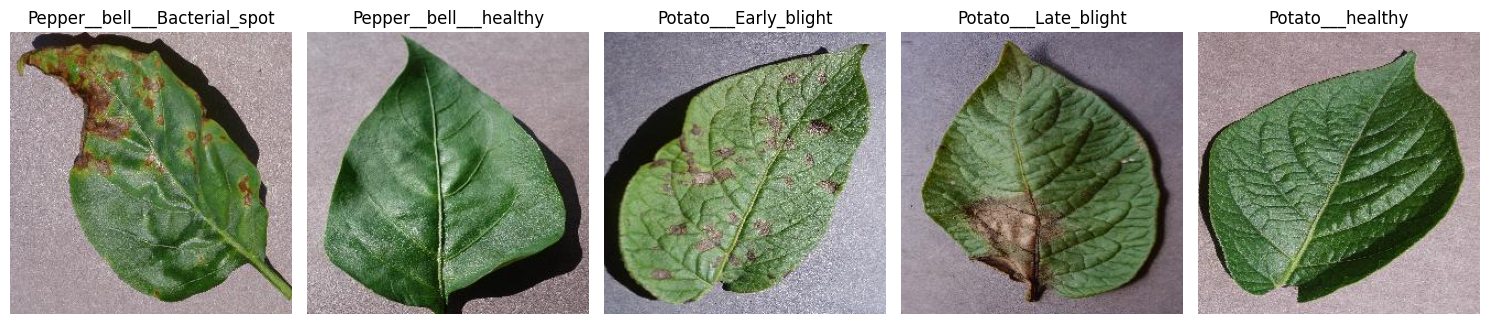

In [14]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image_1 = random.sample(os.listdir(target_folder), 1)

# Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image_1[0]) 
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") 

# View a random images from the training dataset
plt.figure(figsize = (15, 15))
plt.subplot(151)
view_random_image(target_dir="/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/train/",
                        target_class= 'Pepper__bell___Bacterial_spot')
plt.subplot(152)
view_random_image(target_dir="/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/train/",
                        target_class= 'Pepper__bell___healthy')
plt.subplot(153)
view_random_image(target_dir="/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/train/",
                        target_class= 'Potato___Early_blight')
plt.subplot(154)
view_random_image(target_dir="/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/train/",
                        target_class= 'Potato___Late_blight')
plt.subplot(155)
view_random_image(target_dir="/mnt/c/Users/magal/Documents/M1/S2/Projet annuel/plantvillage-Splitted/train/",
                        target_class= 'Potato___healthy')
plt.tight_layout()

## another way to read and store the data

In [15]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir:
        if directory == ".DS_Store":
            root_dir.remove(directory)

    for plant_folder in root_dir:
        plant_disease_folder_list = listdir(join(directory_root, plant_folder))

        for disease_folder in plant_disease_folder_list:
            if disease_folder == ".DS_Store":
                plant_disease_folder_list.remove(disease_folder)

            plant_disease_folder_path = join(directory_root, plant_folder, disease_folder)
            if not isdir(plant_disease_folder_path):
                continue

            print(f"[INFO] Processing {plant_disease_folder_path} ...")
            plant_disease_image_list = listdir(plant_disease_folder_path)

            for single_plant_disease_image in plant_disease_image_list:
                if single_plant_disease_image == ".DS_Store":
                    continue

                image_path = join(plant_disease_folder_path, single_plant_disease_image)
                if isfile(image_path) and (image_path.endswith(".jpg") or image_path.endswith(".JPG")):
                    image_list.append(convert_image_to_array(image_path))
                    label_list.append(disease_folder)

    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing /mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Pepper__bell___Bacterial_spot ...
[INFO] Processing /mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Pepper__bell___healthy ...
[INFO] Processing /mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Potato___Early_blight ...
[INFO] Processing /mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Potato___healthy ...
[INFO] Processing /mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Potato___Late_blight ...
[INFO] Processing /mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Tomato_Bacterial_spot ...
[INFO] Processing /mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Tomato_Early_blight ...
[INFO] Processing /mnt/c/Users/magal/Documents/M1/S2/Projet annuel/PlantVillage/PlantVillage/Tomato_healthy ...
[INFO] Processing /mnt/c/Use

: 

: 

: 

Get Size of Processed Image

In [2]:
image_size = len(image_list)

NameError: name 'image_list' is not defined

Transform Image Labels uisng [Scikit Learn](http://scikit-learn.org/)'s LabelBinarizer

In [45]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [47]:
print(label_binarizer.classes_)

['diseased' 'healthy']


In [48]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [52]:
print(f"Number of images: {len(np_image_list)}")
print(f"Number of labels: {len(label_list)}")
print(f"Number of transformed labels: {len(image_labels)}")

print("Sample images:", np_image_list[:5])
print("Sample labels:", label_list[:5])
print("Sample transformed labels:", image_labels[:5])

x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

Number of images: 0
Number of labels: 4
Number of transformed labels: 4
Sample images: []
Sample labels: ['healthy', 'diseased', 'healthy', 'diseased']
Sample transformed labels: [[1]
 [0]
 [1]
 [0]]


ValueError: Found input variables with inconsistent numbers of samples: [0, 4]

In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

## Create CNN Model

In [ ]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)        0         
__________

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

Epoch 1/25
73/73 [==============================] - 37s 506ms/step - loss: 0.2037 - acc: 0.9357 - val_loss: 0.4444 - val_acc: 0.9171
Epoch 2/25
73/73 [==============================] - 29s 403ms/step - loss: 0.1731 - acc: 0.9426 - val_loss: 0.6579 - val_acc: 0.9144
Epoch 3/25
73/73 [==============================] - 29s 403ms/step - loss: 0.1464 - acc: 0.9505 - val_loss: 1.1111 - val_acc: 0.8873
Epoch 4/25
73/73 [==============================] - 30s 405ms/step - loss: 0.1350 - acc: 0.9531 - val_loss: 0.3073 - val_acc: 0.9248
Epoch 5/25
73/73 [==============================] - 29s 402ms/step - loss: 0.1006 - acc: 0.9638 - val_loss: 0.3404 - val_acc: 0.9293
Epoch 6/25
73/73 [==============================] - 30s 405ms/step - loss: 0.0936 - acc: 0.9662 - val_loss: 0.5524 - val_acc: 0.9205
Epoch 7/25
73/73 [==============================] - 29s 404ms/step - loss: 0.0863 - acc: 0.9680 - val_loss: 0.2914 - val_acc: 0.9362
Epoch 8/25
73/73 [==============================] - 30s 405ms/step - 

## Plot the train and val curve

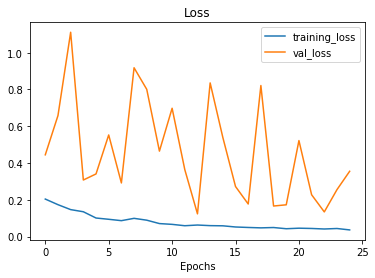

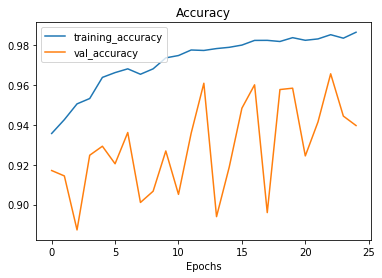

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history["acc"]
  val_accuracy = history.history['val_acc']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
plot_loss_curves(history)

Model Accuracy

In [ ]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

591/591 [==============================] - 1s 2ms/step
Test Accuracy: 93.96503236894883


In [ ]:
model.save('CNN_Model.h5')

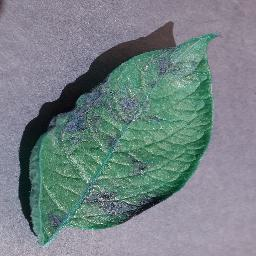

In [ ]:
import tensorflow as tf
y_pred = model.predict(x_test)
img = tf.keras.preprocessing.image.array_to_img(x_test[1])
img

In [ ]:
print("Originally : ",label_binarizer.classes_[np.argmax(y_test[1])])
print("Predicted : ",label_binarizer.classes_[np.argmax(y_pred[1])])

Originally :  Potato___Late_blight
Predicted :  Potato___Late_blight


In [ ]:
model.save('plant_disease_model.h5')
